CNN using PCA

Read the files from the drive and form a dataframe from all the files

In [1]:
import pandas as pd

df1 = pd.read_csv("/content/drive/MyDrive/archive (3)/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/content/drive/MyDrive/archive (3)/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/content/drive/MyDrive/archive (3)/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/content/drive/MyDrive/archive (3)/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/content/drive/MyDrive/archive (3)/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/content/drive/MyDrive/archive (3)/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/content/drive/MyDrive/archive (3)/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/content/drive/MyDrive/archive (3)/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")


df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

The DataFrame Looks like

In [2]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Consider all bot labels

In [3]:
df.iloc[:,-1:].value_counts()

 Label                    
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
dtype: int64

In [4]:
data = df.loc[df[' Label'] == 'Bot']
data1 = df.loc[df[' Label'] == 'BENIGN'].sample(1966)

da = pd.concat([data,data1])

del data
del data1

In [5]:
import numpy as np

# assume your DataFrame is named 'df'
da = da.replace([np.inf, -np.inf], np.nan)  # replace infinite values with NaN
#da = da[da.abs() < np.finfo(np.float64).max]  # remove all rows containing values larger than max float

da = da.dropna()

# print the new DataFrame shape to verify the infinite or too large values have been removed
print(da.shape)

da

(3921, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
24072,8080,60202640,9,9,322,256,322,0,35.777778,107.333333,...,32,63678.2,22252.53596,103175,50911,10200000.0,34941.27201,10200000,10100000,Bot
24677,8080,57891,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.00000,0,0,0.0,0.00000,0,0,Bot
56376,8080,134812,4,3,206,134,194,0,51.500000,95.042096,...,20,0.0,0.00000,0,0,0.0,0.00000,0,0,Bot
56401,1841,84,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.00000,0,0,0.0,0.00000,0,0,Bot
56596,8080,127781,4,3,206,134,194,0,51.500000,95.042096,...,20,0.0,0.00000,0,0,0.0,0.00000,0,0,Bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266390,53,30762,1,1,51,67,51,51,51.000000,0.000000,...,20,0.0,0.00000,0,0,0.0,0.00000,0,0,BENIGN
566632,53,61921,2,2,60,344,30,30,30.000000,0.000000,...,32,0.0,0.00000,0,0,0.0,0.00000,0,0,BENIGN
666770,53,175,2,2,72,136,36,36,36.000000,0.000000,...,20,0.0,0.00000,0,0,0.0,0.00000,0,0,BENIGN
377220,28205,13786,15,6,19897,0,2896,0,1326.466667,1136.570208,...,32,0.0,0.00000,0,0,0.0,0.00000,0,0,BENIGN


In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

target = da[' Label']
da.drop(' Label', axis=1, inplace = True)

# Identify categorical and numerical columns
cat_cols = [col for col in da.columns if da[col].dtype == 'object']
num_cols = [col for col in da.columns if da[col].dtype != 'object']

# Perform one-hot encoding on categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(da[cat_cols])

encoded_feature_names = encoder.get_feature_names_out(cat_cols)

# Perform scaling on numerical columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(da[num_cols])

# Concatenate the encoded and scaled features
encoded_df = pd.DataFrame(encoded_features.toarray(), columns = encoded_feature_names)
scaled_df = pd.DataFrame(scaled_features, columns=num_cols)
df_encoded = pd.concat([encoded_df, scaled_df], axis=1)

#df_encoded['Label'] = target

# Print the resulting dataframe
print(df_encoded.head())


    Destination Port   Flow Duration   Total Fwd Packets  \
0          -0.272568        2.546260            0.115375   
1          -0.272568       -0.254749           -0.133069   
2          -0.272568       -0.251167           -0.039903   
3          -0.587181       -0.257441           -0.133069   
4          -0.272568       -0.251494           -0.039903   

    Total Backward Packets  Total Length of Fwd Packets  \
0                 0.075368                    -0.097785   
1                -0.103693                    -0.121994   
2                -0.058928                    -0.106507   
3                -0.103693                    -0.121543   
4                -0.058928                    -0.106507   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                     -0.050491                0.006460   
1                     -0.053584               -0.184065   
2                     -0.051965               -0.069277   
3                     -0.053511               -0

In [7]:
from sklearn.preprocessing import LabelEncoder

# create a pandas DataFrame with a 1D column
y = target

# instantiate a LabelEncoder object
le = LabelEncoder()

# fit and transform the column
y = le.fit_transform(y)

# print the encoded DataFrame
print(y)

[1 1 1 ... 0 0 0]


In [8]:
df_encoded['l'] = y

In [9]:
df_encoded.shape

(3921, 79)

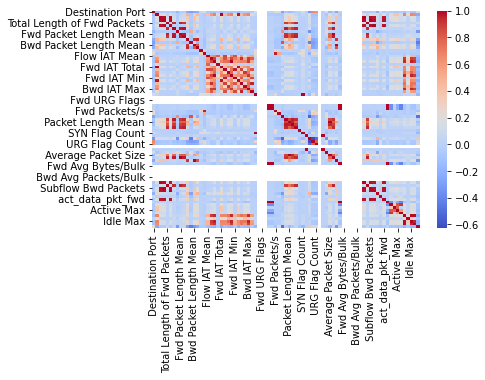

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# assume your DataFrame is named 'df'
corr_matrix = df_encoded.corr()

# create a heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm')

# show the plot
plt.show()


[2.00858127e-01 1.47559083e-01 1.03815073e-01 6.80758836e-02
 6.41851740e-02 5.22669284e-02 3.95648703e-02 3.74355214e-02
 3.26476918e-02 2.99553141e-02 2.91135253e-02 2.67361795e-02
 2.13488877e-02 1.91749029e-02 1.48017501e-02 1.38352851e-02
 1.32846444e-02 1.28171734e-02 1.07118919e-02 9.89260730e-03
 8.69445821e-03 8.26654404e-03 7.30271579e-03 5.79152898e-03
 3.38221726e-03 2.96986180e-03 2.71030062e-03 2.31787894e-03
 2.04389572e-03 1.69660594e-03 1.40783655e-03 9.52278456e-04
 7.64413629e-04 6.26844871e-04 4.66289102e-04 4.59788127e-04
 3.99979333e-04 3.66187317e-04 3.10064805e-04 2.79240268e-04
 1.60855695e-04 1.41708376e-04 1.00490895e-04 9.31606344e-05
 5.68242823e-05 5.18108100e-05 3.72512541e-05 2.46476745e-05
 1.21517642e-05 8.62076131e-06 5.81619935e-06 4.71671416e-06
 4.32088600e-06 4.04949445e-06 2.64760777e-06 1.48216846e-06
 8.29940050e-12 6.59162058e-12 2.14611504e-23 3.96122810e-32
 7.80317220e-34 7.80317220e-34 7.80317220e-34 7.80317220e-34
 7.80317220e-34 7.803172

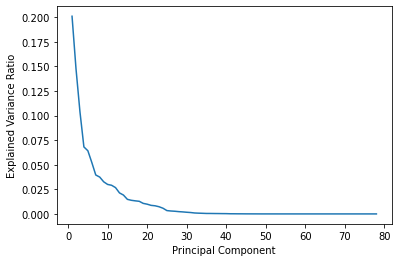

In [11]:
from sklearn.decomposition import PCA

# assume your DataFrame is named 'df'
# assume your target variable is named 'target'
X = df_encoded.drop('l', axis=1)
y = df_encoded['l']

# instantiate the PCA object with n_components = number of features
pca = PCA(n_components=X.shape[1])

# fit and transform the data
X_pca = pca.fit_transform(X)

# print the explained variance ratio for each principal component
print(pca.explained_variance_ratio_)

# plot the explained variance ratio for each principal component
import matplotlib.pyplot as plt
plt.plot(range(1,X.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# select the best features based on the explained variance ratio
best_features = X.columns[:35] # example: select the first three principal components
X_best = X_pca[:,:35] # example: use the first three principal components as the new features


In [12]:
X_best.shape

(3921, 35)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_best,y, test_size=0.2, random_state=100)

X_train.shape

(3136, 35)

In [14]:
#X_train_data = X_train.iloc[:, :-1].values
#X_test_data = X_test.iloc[:, :-1].values
#X_test_data

In [15]:
# reshape the data for CNN
X_train_d = X_train.reshape(len(X_train), X_train.shape[1] , 1)
X_test_d = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train_d.shape, X_test_d.shape

((3136, 35, 1), (785, 35, 1))

In [16]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define your 1D CNN model
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(X_train_d.shape[1],1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='sigmoid'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
#model.load_weights('model_weights.h5') # Load the weights

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,y_train)


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # Convert probabilities to binary values


# Calculate the accuracy score of your model
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)


25/25 [==============================] - 0s 3ms/step


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)